In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
ls -lrt

total 389400
drwxr-xr-x. 2 jacobnogas bandits        45 Nov 22 10:58 bbUnEqualMeansEqualPriorburn_in_size-batch_size=1-1/
-rw-r--r--. 1 jacobnogas bandits 398294921 Nov 22 23:02 bbUnEqualMeansEqualPriorburn_in_size-batch_size=1-1BB0.1Df_sim=2000_m=0_r=0.pkl
-rw-r--r--. 1 jacobnogas bandits    448255 Nov 23 13:40 Exploration for Figure 3 Effect 0.1.ipynb


In [2]:
f = "bbUnEqualMeansEqualPriorburn_in_size-batch_size=1-1BB0.1Df_sim=2000_m=0_r=0.pkl"

In [5]:
SMALL_SIZE = 10           
MEDIUM_SIZE = 13          
BIGGER_SIZE = 14
 
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes                                                                 
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title    
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=8.5)    # fontsize of the tick labels
plt.rc('ytick', labelsize= 8)    # fontsize of the tick labels    
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize 
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title  

In [13]:
df = pd.read_pickle(f)  
df_785 = df[df["num_steps"] == 785] 
df_785_ltn = df_785[df_785["wald_type_stat"] < 1.79]   
df_785_ltn = df_785_ltn[df_785_ltn["wald_type_stat"] > 1] 

In [14]:
len(df_785_ltn)

578

In [113]:
def plot_with_err(df, title):
    fig,ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(df))
    df_ = df.iloc[0:782:20]
    x = x[::20]
    se_mean_1 = np.sqrt(df_["mean_1"]*(1-df_["mean_1"])/df_["sample_size_1"])
    se_mean_2 = np.sqrt(df_["mean_2"]*(1-df_["mean_2"])/df_["sample_size_2"])
    
    ax.errorbar(x=x, y=df_["mean_1"], yerr= 1.96*se_mean_1, fmt = "o-", capsize = 2.0,\
                label = "$\hat p_1$: Sample Estimate of $p_1$")
    ax.errorbar(x=x, y=df_["mean_2"], yerr= 1.96*se_mean_2, fmt = "o-", capsize = 2.0,\
                label  = "$\hat p_2$: Sample Estimate of $p_2$")
    ax.axhline(0.55, linestyle = "--", color = "black")
    ax.axhline(0.45, linestyle = "--", color = "black")
    
    ax.set_ylabel("Sample Estimates of Means")
    ax.set_xlabel("Number of Participants/Trials")
    ax.set_ylim(0,1)

    
    ax2=ax.twinx()
    ax2.set_ylabel("Arm 1 Assignment Probability")
    ax.plot(x, df_['arm1_assignment_prob'], label = "Arm1 Assignment Probability")
    ax.set_title(title, pad = 15)
    #ax.legend()
    ax.legend(bbox_to_anchor=(0.68, 0.30))
    plt.tight_layout()
    fig.savefig("FullHistoryJMLR_ArmDiff0pt1.png")



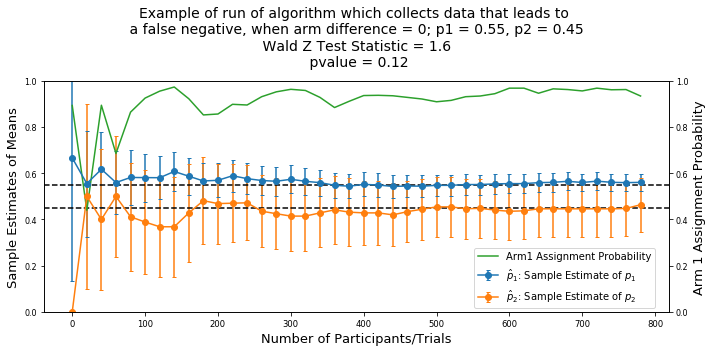

In [114]:
#Sim 98 will be used
sim = 412
df_curr = df[df["sim"] == sim]  
df_curr = df_curr[2:]
zstat = np.round(df_curr.iloc[-1]["wald_type_stat"], 1)
pval = np.round(df_curr.iloc[-1]["wald_pval"], 2)
title = "Example of run of algorithm which collects \
data that leads to \n a false negative, when arm difference = 0; p1 = 0.55, p2 = 0.45 \n \
Wald Z Test Statistic = {} \n pvalue = {}".format(zstat, pval)

plot_with_err(df_curr, title = title)

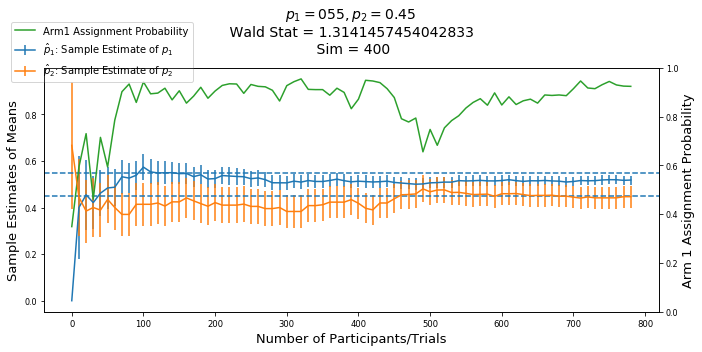

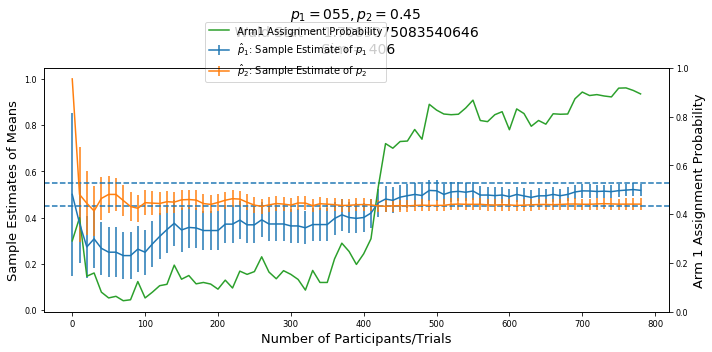

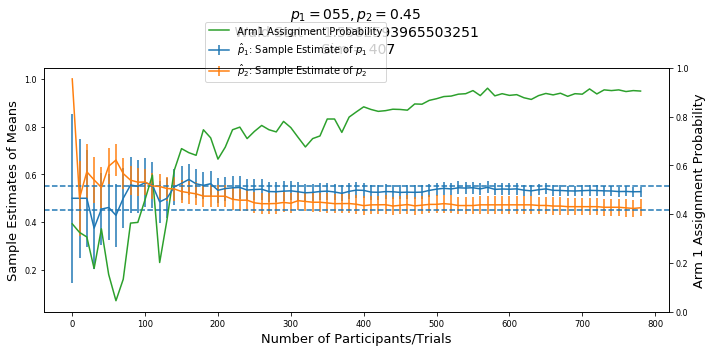

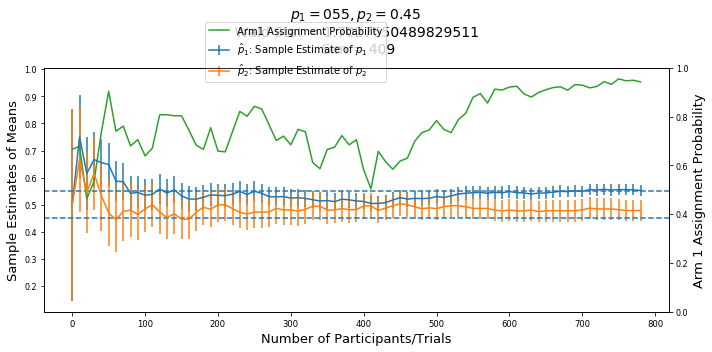

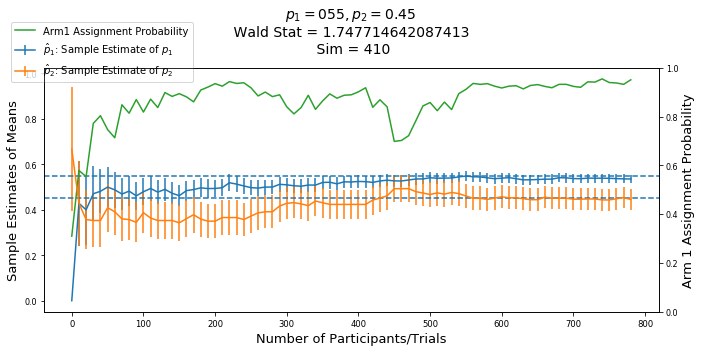

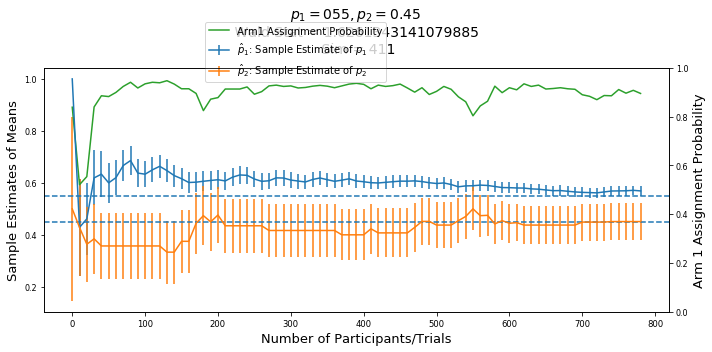

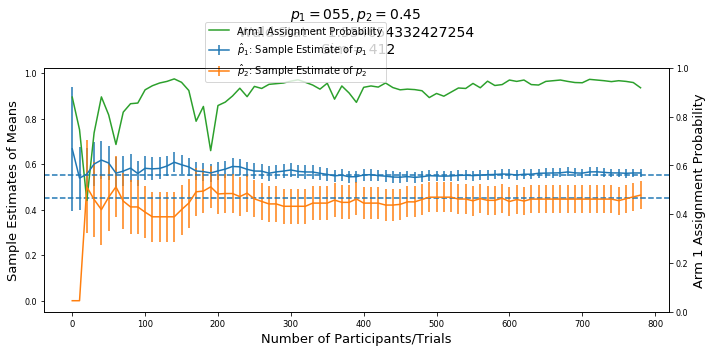

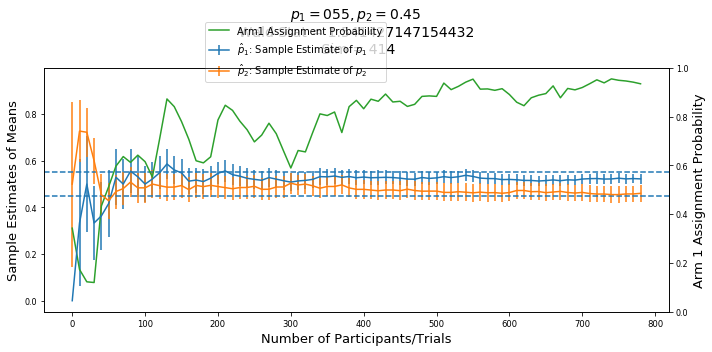

In [28]:
#check average means when there is a false positive
#do8 more with wald stat > 2.1
for i in range(8):
    sim = df_785_ltn["sim"].iloc[i + 100]
    df_curr = df[df["sim"] == sim]  
    df_curr = df_curr[2:]
    plot_with_err(df_curr, title = "$p_1 = 055, p_2=0.45$ \n Wald Stat = {} \n Sim = {}".format(df_curr.iloc[-1]["wald_type_stat"], sim))
